In [1]:
import os
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision.transforms import ToTensor, Lambda
from torchvision import datasets
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv("Path + filename")

with os.scandir("Path til billeder") as entries:
    for entry in entries:
        img = np.load(entry)
        label = df. iloc[(str(entry) + '.npy')]

In [2]:
training_data = datasets.CIFAR10(
    root ="data",
    train=True,
    download=False,
    transform=ToTensor()
)

test_data = datasets.CIFAR10(
    root ="data",
    train=False,
    download=False,
    transform=ToTensor()
)
trainloader = torch.utils.data.DataLoader(training_data, batch_size=4, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(test_data,batch_size=4, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

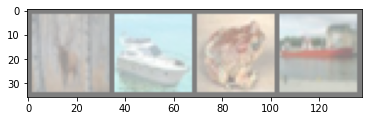

 deer  ship  frog  ship


In [3]:
def imshow(img):
    img = img/2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()
dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))

print (' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [4]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.conv1 = nn.Conv2d(3,6,5)
        self.pool  = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1   = nn.Linear(16*5*5,120)
        self.fc2   = nn.Linear(120,84)
        self.fc3   = nn.Linear(84,10)

    def forward(self,x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1,16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
net = Net()


In [5]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [6]:
for epoch in range(2):
    running_loss=0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i+1, running_loss/2000))
            running_loss = 0.0
print('Finished Training')

[1,  2000] loss: 2.283
[1,  4000] loss: 2.076
[1,  6000] loss: 1.897
[1,  8000] loss: 1.750
[1, 10000] loss: 1.658
[1, 12000] loss: 1.574
[2,  2000] loss: 1.531
[2,  4000] loss: 1.483
[2,  6000] loss: 1.448
[2,  8000] loss: 1.429
[2, 10000] loss: 1.388
[2, 12000] loss: 1.385
Finished Training


In [7]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

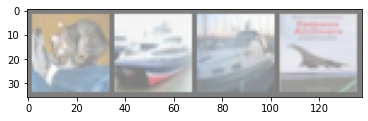

GroundTruth:    cat  ship  ship plane


In [8]:
dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ',' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [9]:
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [10]:
outputs= net(images)

In [11]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat   car truck plane


In [12]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data,1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100*correct/total))

Accuracy of the network on the 10000 test images: 51 %


In [13]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
for i in range(10):
    print('Accuracy of %5s : %2d %%' %(
        classes[i], 100*class_correct[i] / class_total[i]))

Accuracy of plane : 62 %
Accuracy of   car : 63 %
Accuracy of  bird : 54 %
Accuracy of   cat : 39 %
Accuracy of  deer : 35 %
Accuracy of   dog : 43 %
Accuracy of  frog : 57 %
Accuracy of horse : 45 %
Accuracy of  ship : 54 %
Accuracy of truck : 58 %


In [52]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(device)

cpu
